In [11]:
# import
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
# set style
mpl.style.use("seaborn-ticks")

# plot inline
%matplotlib inline

# pangenome profile
# input: path to cdhit output, parsed file: abs_pattern, clus_detail
def pangenome_profile(abs_pattern, identity):
    
    # load dataframe
    cdhit_path = "/home/hermuba/data/genePredicted/cdhit/"
    df = pd.read_pickle(cdhit_path + abs_pattern)
    
    # core genome, accessory genome
    gene_count = df.sum(axis = 0)
    core = gene_count.loc[gene_count == 59] 
    accessory = gene_count.loc[gene_count != 59]
    unique = gene_count.loc[gene_count == 1]
    
    
    ct = pd.DataFrame(columns = ['core', 'accessory', 'pangenome']) # pangenome growth plot
    i = 0
    for index, row in df.iterrows():
        i = i + 1
        count = df.iloc[:i, :]
    
        count = count.sum(axis = 0)
    
        al = len(count.loc[count > 0])
        cr = len(count.loc[count == i])
        acc = al - cr ######
        ct.loc[index, 'core'] = cr
        ct.loc[index, 'accessory'] = acc
        ct.loc[index, 'pangenome'] = al
    
    # plotting the growth 
    ax = ct.plot(use_index = False, figsize = (5,3.75))
    plt.xticks(np.arange(0, 58, 1), np.arange(1, 59, 1))
    ax.set_title("pangenome growth, identity threshold = "+identity + "%")
    ax.grid(False)
    ax.set_xlabel("No. of genome used")
    ax.set_xlim(xmin=0, xmax = 58)
    ax.set_xticks([0,4,9,14,19,24,29,34,39,44,49,54])
    ax.set_xticklabels([1,5,10,15,20,25,30,35,40,45,50,55])
    ax.set_ylabel("No. of genes")
    ax.set_ylim(ymin=0, ymax = 15950)
    rect = ax.patch  # a Rectangle instance

    rect.set_alpha(0)
    
    
    plt.savefig(cdhit_path+"thres"+identity+".pdf", format = 'pdf', dpi = 350)
    
    return(len(core), len(accessory), len(unique))

(2874, 13076, 5535)

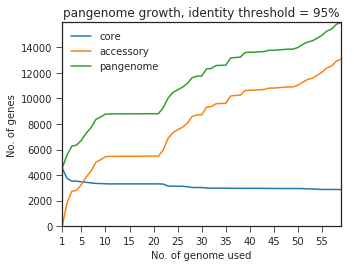

In [12]:
pangenome_profile('ec0102_df', '95')

(3007, 11054, 4436)

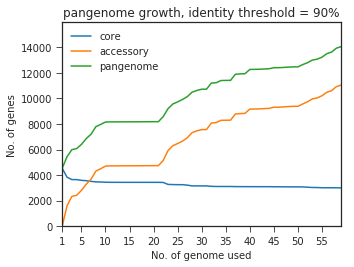

In [13]:
pangenome_profile('ec90.clstr_df', '90')

(3068, 9682, 3609)

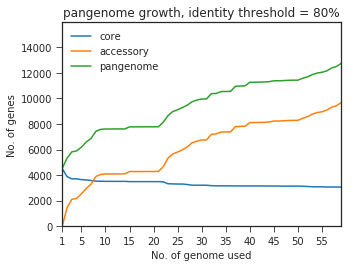

In [14]:
pangenome_profile('ec80.clstr_df', '80')

(3074, 8971, 3179)

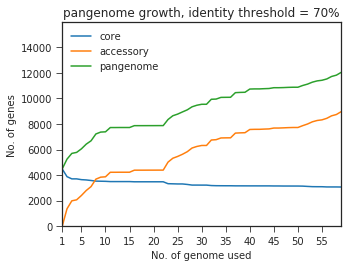

In [15]:
pangenome_profile('ec70.clstr_df', '70')

In [6]:
### calculations related to COG annotation
# count cog
def cog_dis(df): # parse cog
    result = pd.DataFrame(np.zeros((1,26)), columns = ['J','A','K','L','B','D','Y','V','T','M','N','Z','W','U','O','C','G','E','F','H','I','P','Q','R','S','NaN'])
    cog = list(df.loc[df['cog'].notnull()]['cog'])
    for str in cog:
        for s in str:
            result[s] += 1
    result['NaN'] = df.shape[0]-len(cog)
    return(result)

# apply count cog to all of them!
import math
cog_seperate = pd.DataFrame(columns = ['J','A','K','L','B','D','Y','V','T','M','N','Z','W','U','O','C','G','E','F','H','I','P','Q','R','S','NaN'])
for percentile in range(11):
    sub_df = cluster_detail.loc[cluster_detail['prevalance'].apply(lambda x: math.floor(x/0.1)) == percentile]
    cog_seperate = cog_seperate.append(cog_dis(sub_df), ignore_index = True)

# move legend to side

ax = cog_seperate.plot(kind = 'bar', figsize = (10,5),  stacked=True, colormap = 'tab20b')
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
ax.set_xlabel("Frequency (%)")
ax.set_xticklabels(range(0,110,10))
ax.set_ylabel("No. of genes")
        

In [9]:
### calculations related to CARD annotation
card_seperate = pd.DataFrame(columns = ['card', 'no card'])
for percentile in range(11):
    sub_df = cluster_detail.loc[cluster_detail['prevalance'].apply(lambda x: math.floor(x/0.1)) == percentile]
    card = sub_df.loc[sub_df['card_count'] > 0].shape[0]
    no_card = sub_df.shape[0]-card
    card_seperate = card_seperate.append({'card':card,'no card': no_card}, ignore_index = True)

ax = card_seperate.plot(kind = 'bar', figsize = (10,5), xticks= card_seperate.index, stacked=True,logy = True, colormap = 'tab20b')
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
ax.set_xlabel("Frequency (%)")
ax.set_xticklabels(range(0,110,10))
ax.set_ylabel("Log(No. of genes)")                                       
    
fig, ax = plt.subplots()
cluster_detail['card_portion'].hist(bins = 100, ax = ax)
ax.set_yscale('log')
ax.set_ylabel("log count")
ax.set_xlabel("freqency of containing card gene in a cluster")

fig, ax = plt.subplots()
cluster_detail['card_count'].hist(bins = 10, ax = ax)
ax.set_yscale('log')
ax.set_ylabel("log count")
ax.set_xlabel("card gene count")

In [13]:
### calculations related to blast annotation
blast = pd.read_pickle("/home/hermuba/resistanceExp/data/blastp_gi_1022")
# not 1, not 0 card
card = cluster_detail.loc[cluster_detail['card_portion']>0]
not_one = card.loc[card['card_portion']<1]
x = pd.merge(not_one, blast, left_on = 'representing gene header', right_index = True)

FileNotFoundError: [Errno 2] No such file or directory: '/home/hermuba/resistanceExp/data/blastp_gi_1022'

In [ ]:
print(plt.style.available)

In [ ]:
ct.plot(xticks = np.arange(1, 59, 1), use_index = False, figsize = (15,10))

In [ ]:
# core and accessory cog difference
core_cog = cog_dis(cluster_detail.loc[cluster_detail['prevalance']==1])
acc_cog = cog_dis(cluster_detail.loc[cluster_detail['prevalance']<1])
both_cog = core_cog.append(acc_cog, ignore_index = True)
both = both_cog.rename(index = {0:'core', 1:'accessory'})
both.to_excel("/home/hermuba/resistanceExp/EcoliGenomes/figures/core_acc_cog_distribution.xlsx")

In [ ]:
both_cog.plot(kind = 'bar', figsize = (10,5), stacked=True, colormap = 'tab20b').legend(loc='center left', bbox_to_anchor=(1, 0.5))

In [ ]:
ax = both_cog.transpose().plot(kind = 'pie', figsize = (10,5),use_index = False, subplots = True, stacked=True, colormap = 'tab20b', legend = False)
ax[0].set_title("core")
ax[1].set_title("accessory")

In [ ]:
both_cog.sum(axis = 1)

In [ ]:
freq_cog = both_cog
freq_cog.iloc[0,:] = both_cog.iloc[0,:]/2922
freq_cog.iloc[1,:] = both_cog.iloc[1,:]/13468


In [ ]:
(freq_cog.iloc[0,:]/freq_cog.iloc[1,:]).sort_values()

In [ ]:
freq_cog.plot(kind = 'area', figsize = (10,5), stacked=True, colormap = 'tab20b').legend(loc='center left', bbox_to_anchor=(1, 0.5))

In [ ]:
eli_nan = both_cog.iloc[:, 0:25] # 2573, 5840
eli_nan.sum(axis = 1)

In [ ]:
eli_nan.sum(axis = 1)
elif_cog = eli_nan
elif_cog.iloc[0,:] = both_cog.iloc[0,:]/2673
elif_cog.iloc[1,:] = both_cog.iloc[1,:]/5840


In [ ]:
(elif_cog.iloc[0,:]/elif_cog.iloc[1,:]).sort_values()

In [ ]:
elif_cog.plot(kind = 'area', figsize = (10,5), stacked=True, colormap = 'tab20b').legend(loc='center left', bbox_to_anchor=(1, 0.5))

In [ ]:
elif_cog.plot(kind = 'bar', figsize = (10,5), stacked=True, colormap = 'tab20b').legend(loc='center left', bbox_to_anchor=(1, 0.5))

In [ ]:
elif_cog.transpose().plot(kind = 'pie', figsize = (10,5), subplots = True, stacked=True, colormap = 'tab20b', legend = False)